In [1]:
!export PATH="/home/fzaidoun/anaconda3/envs/him/bin:$PATH"

In [2]:
!conda install -c conda-forge dynesty -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/fzaidoun/anaconda3/envs/him

  added / updated specs:
    - dynesty


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    dynesty-1.1                |     pyh44b312d_0          70 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          70 KB

The following NEW packages will be INSTALLED:

  dynesty            conda-forge/noarch::dynesty-1.1-pyh44b312d_0



dynesty-1.1          | 70 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [1]:
import numpy as np
from astropy.io import ascii
from functions import *

In [2]:
print("loading data")
cols = ['u_r',
        'flag_vsquared',
        'flag_voidfinder']
data = ascii.read('../data_flags_updated_Nov1.dat', include_names=cols)
u_r = data['u_r']

print("loading classification")
#classification V^2
wall_v2 = np.argwhere(data['flag_vsquared'] == 0).flatten()
void_v2 = np.argwhere(data['flag_vsquared'] == 1).flatten()
edge_v2 = np.argwhere(data['flag_vsquared'] == 2).flatten()
out_v2 = np.argwhere(data['flag_vsquared'] == 9).flatten()

#classification voidfinder
wall_vf = np.argwhere(data['flag_voidfinder'] == 0).flatten()
void_vf = np.argwhere(data['flag_voidfinder'] == 1).flatten()
edge_vf = np.argwhere(data['flag_voidfinder'] == 2).flatten()
out_vf = np.argwhere(data['flag_voidfinder'] == 9).flatten()

## property variables
print("loading property model variables")

# data and range
data1_wall_vf = remove_nan(u_r[wall_vf])
data2_void_vf = remove_nan(u_r[void_vf])
data1_wall_v2 = remove_nan(u_r[wall_v2])
data2_void_v2 = remove_nan(u_r[void_v2])
bins_ = np.linspace(0,4, 170)
label_vf = 'u-r_VF'
label_v2 = 'u-r_V2'

loading data
loading classification
loading property model variables


In [3]:
bounds1 = [[0., 2.],     # s ........ scale factor (peak 1 to 2) #2.5

           [100., 5000.],  # a ........ skew normal 1 amplitude # 2000 and 100
           [1., 1.9],     # mu_a ..... skew normal 1 location  # 0.5
           [0.1,3],     # sigma_a .. skew normal 1 scale #0.2
           [-10., 10.],    # a_skew ... skew normal 1 skew

           [150., 3000.],  # b ........ skew normal 2 amplitude #6100 and 150
           [2.5, 3.],     # mu_b ..... skew normal 2 location #0.9  # should not overlap with mu_a
           [0.05, 1.],     # sigma_b .. skew normal 2 scale #0.1
           [-10., 10.]]    # b_skew ... skew normal 2 skew

# [ 5.01008595e-01,  2.85964668e+03,  1.40000000e+00,  6.81468683e-01,
#         1.85218399e+00,  1.65211528e+03,  2.88622901e+00,  2.49609020e-01,
#        -2.46416374e+00]

In [4]:
def prior_xform1(u):
    """Priors for the 9 parameters of model M1. Required by the dynesty sampler.

    Parameters
    ----------
    u : ndarray
        Array of uniform random numbers between 0 and 1.

    Returns
    -------
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    """
    s       = uniform(0.1, 10., u[0])
    a       = jeffreys(1., 1e4, u[1])
    mu_a    = uniform(1., 1.9, u[2])
    sigma_a = jeffreys(0.1, 3., u[3])
    xi_a    = uniform(-10., 10., u[4])
    b       = jeffreys(1., 1e4, u[5])
    mu_b    = uniform(2.5, 3., u[6])
    sigma_b = jeffreys(0.05, 2., u[7])
    xi_b    = uniform(-10., 10., u[8])

    return s, a, mu_a, sigma_a, xi_a, b, mu_b, sigma_b, xi_b

In [5]:
bounds1_ = [[100., 5000.],  # change after running model 1
        [1.4, 1.9],     # mu_a ..... skew normal 1 location #0.5
        [0.1, 2.0],     # sigma_a .. skew normal 1 scale #0.7
        [-10., 10.],    # a_skew ... skew normal 1 skew
        [100., 5000.],  # b ........ skew normal 2 amplitude #6100
        [2.5, 3],     # mu_b ..... skew normal 2 location #0.9
        [0.1, 1.0],     # sigma_b .. skew normal 2 scale #0.4
        [-10., 10.]]    # a_skew ... skew normal 2 skew

bounds2_ = [[100., 1000.],    # change after running model 1
            [1.4, 1.9],     # mu_g ..... skew normal 3 location #0.5
            [0.1, 2.0],     # sigma_g .. skew normal 3 scale #0.6
            [-10, 10.],    # g_skew ... skew normal 3 skew
            [100., 1500.],   # d ........ skew normal 4 amplitude #800
            [2.5, 3],     # mu_d ..... skew normal 4 location #0.8
            [0.05, 1.0],     # sigma_d .. skew normal 4 scale #0.3
            [-10., 10.]]    # d_skew ... skew normal 4 skew
bounds2 = bounds1_ + bounds2_


VoidFinder (VF)
plotting histograms of data...


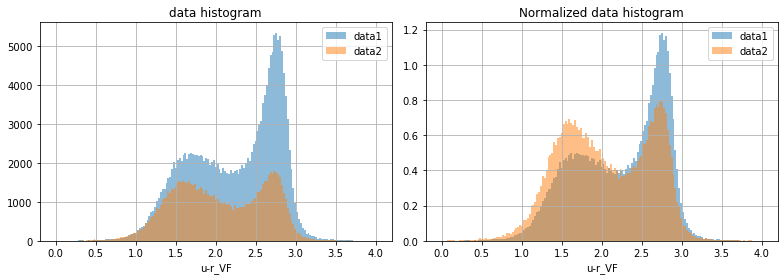

Running Model 1 using VF...


In [8]:
#   1.86320170e+03  2.89413416e+00  2.53340660e-01 -2.62607585e+00
#   1.63971054e+03  1.40466962e+00  6.31739842e-01  1.52232173e+00
#   6.19025760e+02  2.85236695e+00  2.31062770e-01 -1.84972293e+00]
    
def prior_xform2(u):
    """Priors for the 9 parameters of model M1. Required by the dynesty sampler.

    Parameters
    ----------
    u : ndarray
        Array of uniform random numbers between 0 and 1.

    Returns
    -------
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    """
    a       = jeffreys(1., 1e4, u[0])
    mu_a    = uniform(0., 2., u[1])
    sigma_a = jeffreys(0.05, 2., u[2])
    xi_a    = uniform(-10., 10., u[3])
    b       = jeffreys(1., 1e4, u[4])
    mu_b    = uniform(2.1, 3, u[5])
    sigma_b = jeffreys(0.05, 2., u[6])
    xi_b    = uniform(-10., 10., u[7])

    g       = jeffreys(1., 1e4, u[8])
    mu_g    = uniform(0., 2., u[9])
    sigma_g = jeffreys(0.1, 2., u[10])
    xi_g    = uniform(-10., 10., u[11])
    d       = jeffreys(1., 1e4, u[12])
    mu_d    = uniform(2.1, 3, u[13])
    sigma_d = jeffreys(0.05, 2., u[14])
    xi_d    = uniform(-10., 10., u[15])

    return a, mu_a, sigma_a, xi_a, \
           b, mu_b, sigma_b, xi_b, \
           g, mu_g, sigma_g, xi_g, \
           d, mu_d, sigma_d, xi_d


#for VF
print("VoidFinder (VF)")
plot_hist(data1_wall_vf,data2_void_vf,bins_,label_vf)
#model 1
print("Running Model 1 using VF...")

iter: 69 | batch: 0 | bound: 0 | nc: 1 | ncall: 75 | eff(%): 12.000 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-  0.168 | dlogz:    inf >  0.010                                           

running the nested sampler... this might take from minutes to hours...


iter: 43937 | batch: 7 | bound: 541 | nc: 3 | ncall: 460663 | eff(%):  9.538 | loglstar: -5982.417 < -5973.143 < -5974.703 | logz: -6027.323 +/-  0.440 | stop:  0.987                                

sampler output saved as pickle file 'sampler_results_model1_u-r_VF'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 5.01522769e-01  2.85035951e+03  1.38906346e+00  6.88906622e-01
  1.92059554e+00  1.65870043e+03  2.88722203e+00  2.52818362e-01
 -2.52786355e+00]
Best fit results: 
Bayesian Evidence for model 1 :  -6027.352690684113


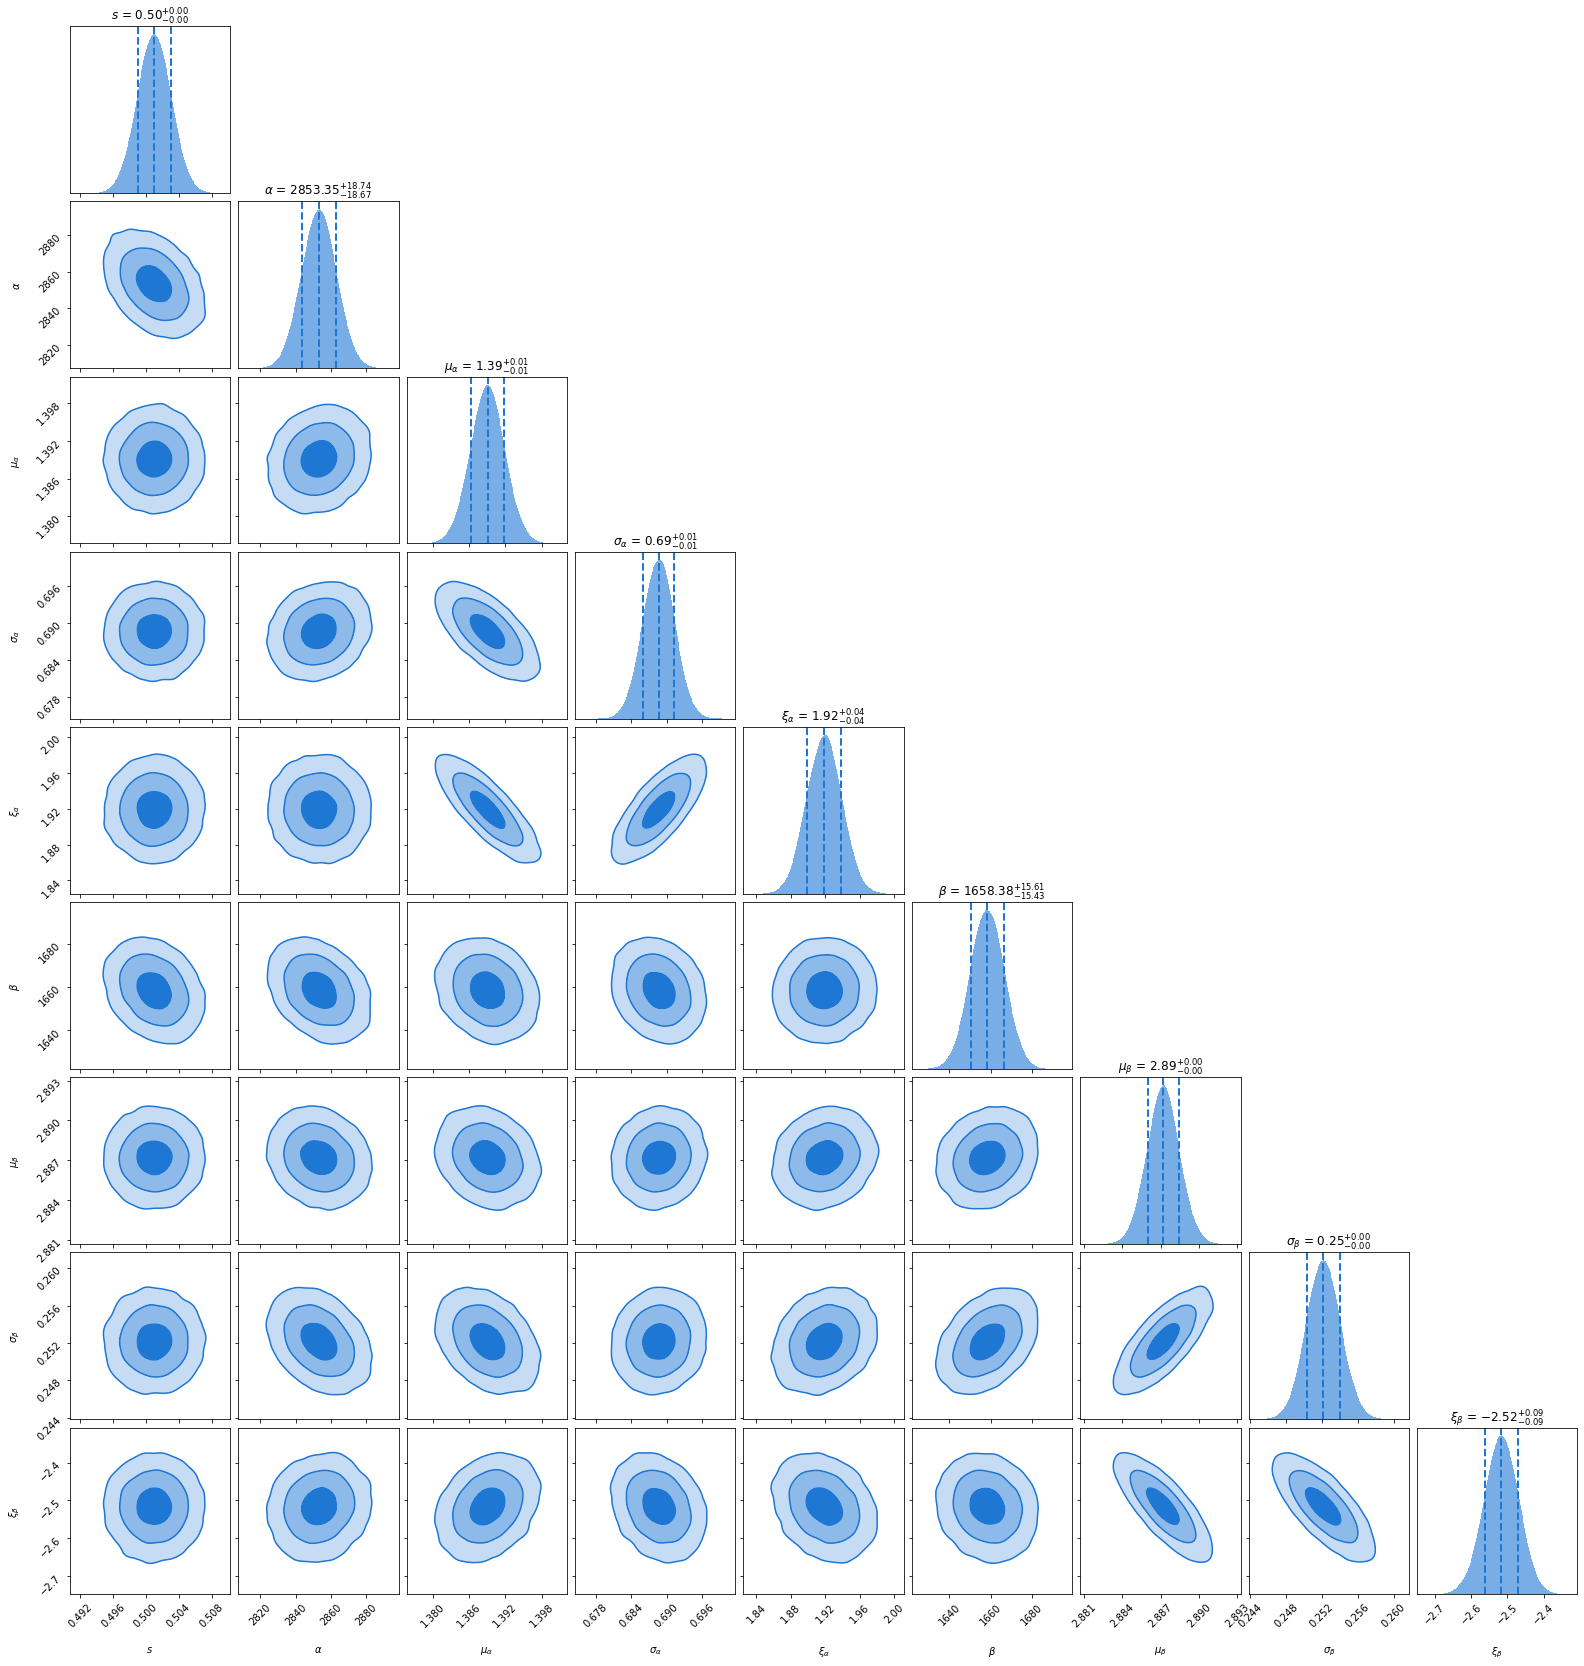

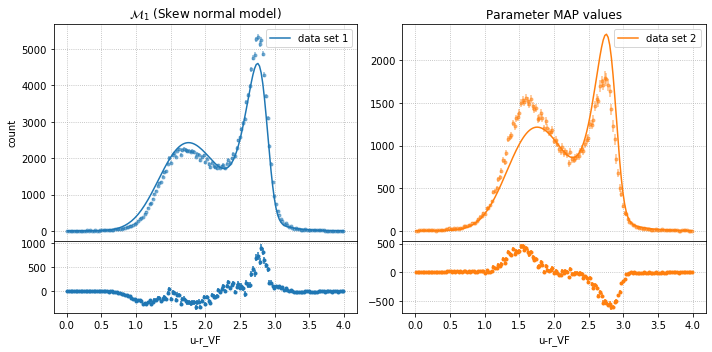

In [21]:
# Model_1_fit(bounds1,data1_wall_vf,data2_void_vf,bins_,label_vf)
Model_1_sampler(prior_xform1,data1_wall_vf,data2_void_vf,bins_,label_vf)
lnZ1_vf = Model1_output(data1_wall_vf,data2_void_vf,bins_,label_vf)

Running Model 2 using VF...
running minimizer...this might take a few minutes...
plotting best fit results...
running the nested sampler... this might take from minutes to hours...


iter: 1813 | batch: 0 | bound: 0 | nc: 158 | ncall: 17704 | eff(%):  9.959 | loglstar:   -inf < -339308.244 <    inf | logz: -339318.774 +/-  0.205 | dlogz: 265568.654 >  0.010                      /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 6834 | batch: 0 | bound: 78 | nc: 25 | ncall: 143373 | eff(%):  4.750 | loglstar:   -inf < -38156.434 <    inf | logz: -38176.996 +/-  0.287 | dlogz: 17568.946 >  0.010                        /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 13315 | batch: 0 | bound: 170 | nc: 25 | ncall: 311401 | eff(%):  4.269 | loglstar:   

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 18373 | batch: 0 | bound: 256 | nc: 25 | ncall: 492810 | eff(%):  3.724 | loglstar:   -inf < -5090.004 <    inf | logz: -5131.776 +/-  0.405 | dlogz: 1435.705 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 18768 | batch: 0 | bound: 263 | 

sampler output saved as pickle file 'sampler_results_model2_u-r_VF'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 2.64681658e+03  1.42489736e+00  6.91417406e-01  1.93222503e+00
  1.86320170e+03  2.89413416e+00  2.53340660e-01 -2.62607585e+00
  1.63971054e+03  1.40466962e+00  6.31739842e-01  1.52232173e+00
  6.19025760e+02  2.85236695e+00  2.31062770e-01 -1.84972293e+00]
Best fit results: 
Bayesian Evidence for model 2 :  -2674.6465168399914


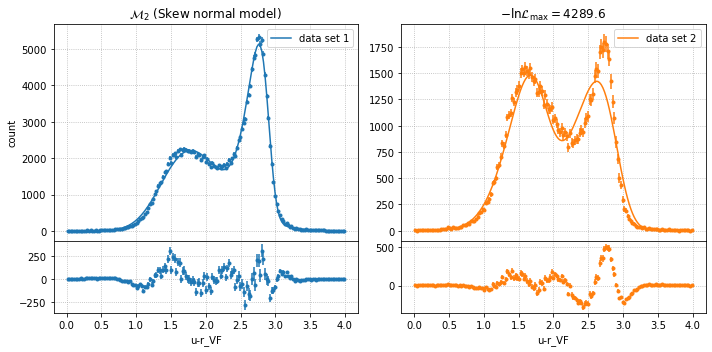

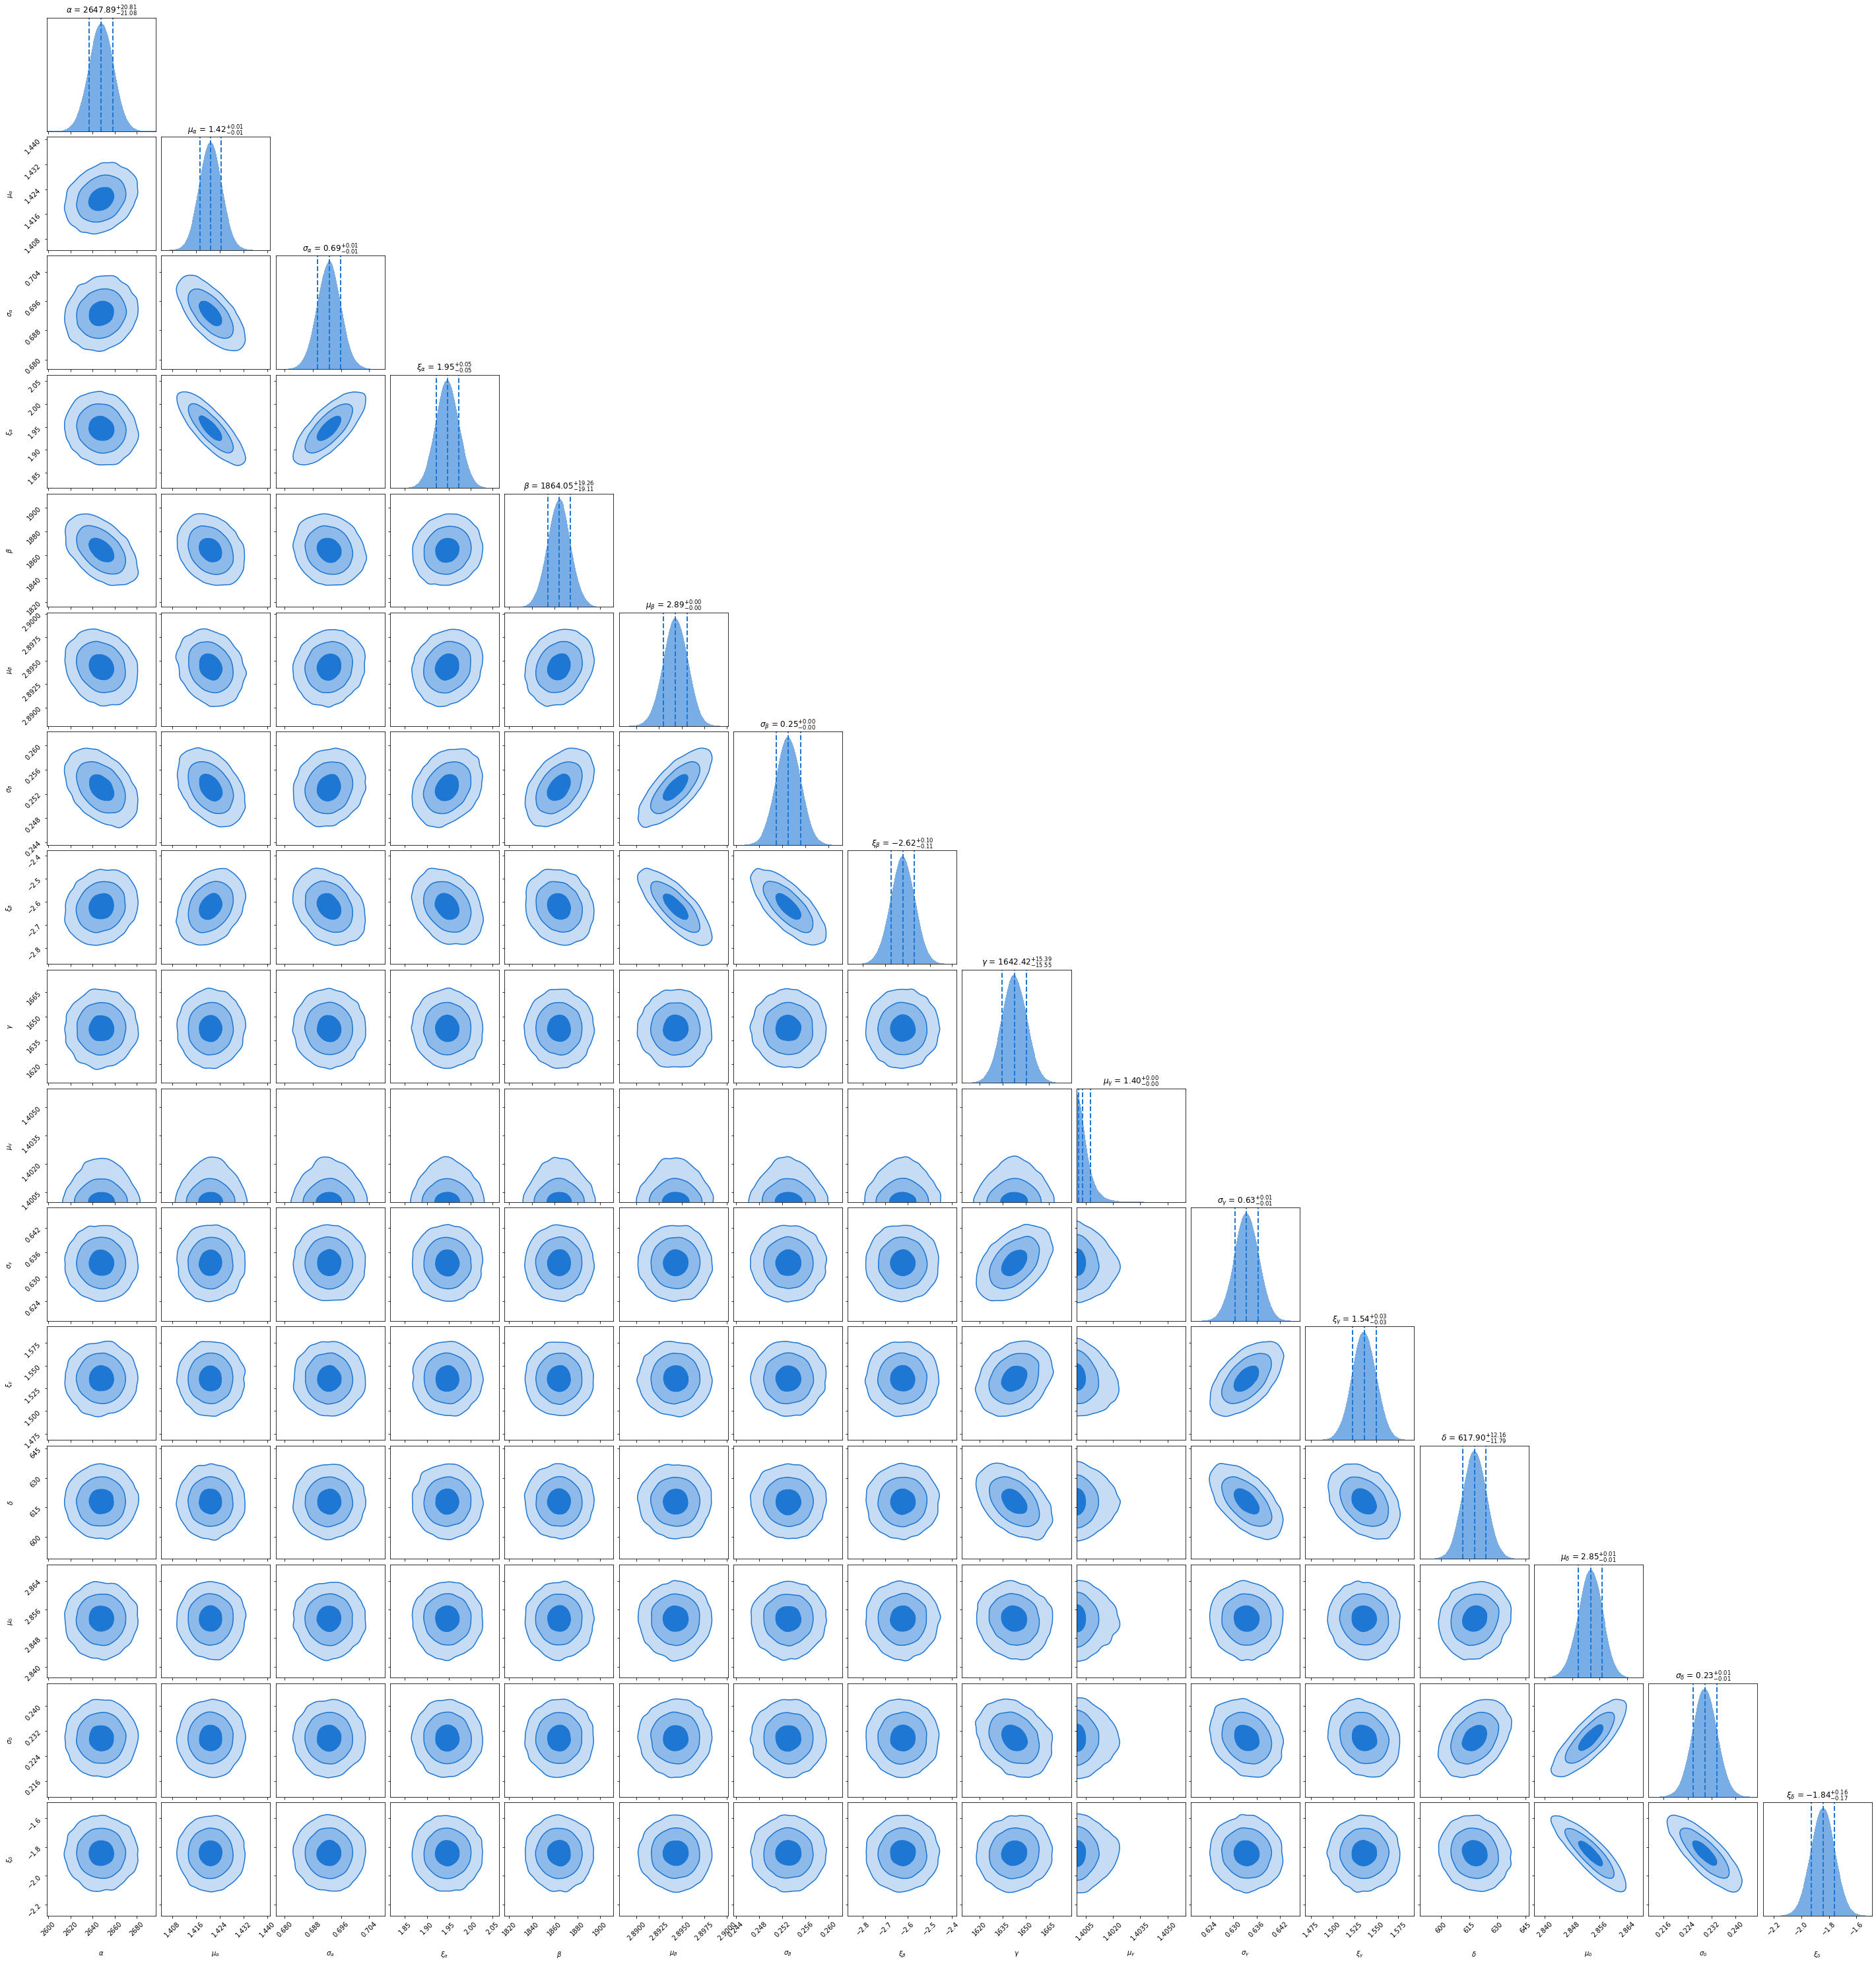

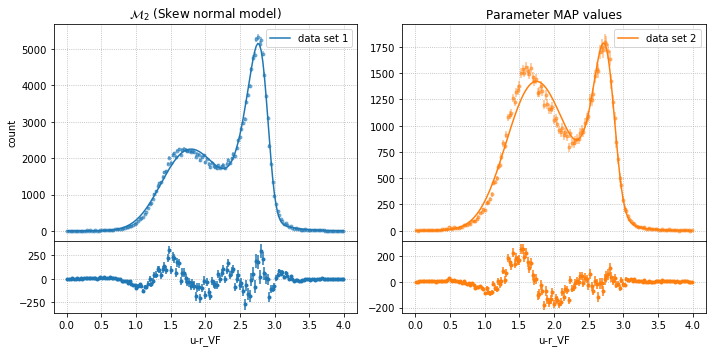

In [7]:
#model2
print("Running Model 2 using VF...")

Model_2_fit(bounds2,data1_wall_vf,data2_void_vf,bins_,label_vf)
Model_2_sampler(prior_xform2,data1_wall_vf,data2_void_vf,bins_,label_vf)
lnZ2_vf = Model2_output(data1_wall_vf,data2_void_vf,bins_,label_vf)




In [8]:
#Baye's Factor
lnB12_vf = lnZ1_vf - lnZ2_vf
logB12_vf = np.log10(np.e) * lnB12_vf
print("Log10 of Baye's Factor for g-r using VF is: ", logB12_vf)


NameError: name 'lnZ1_vf' is not defined

V2
plotting histograms of data...


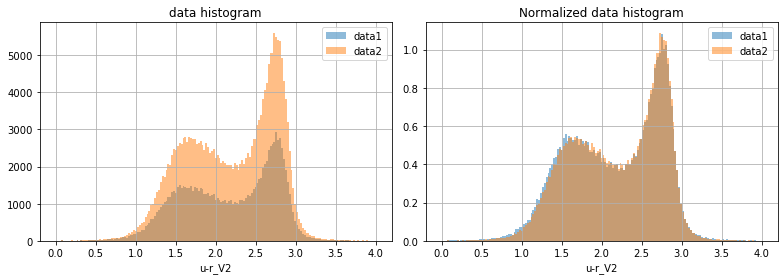

Running Model 1 using V2...
running minimizer...this might take a few minutes...


/gpfs/fs1/home/fzaidoun/Desktop/copy/desi_void_comparison/mixture-models/functions.py:135: RuntimeWarning: divide by zero encountered in log
  return np.sum(m*np.log(lambda1) - lambda1 - gammaln(m+1) + n*np.log(lambda2) - lambda2 - gammaln(n+1))
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


best fit parameters       fun: 2953.9653448497806
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.42192099e-02, -9.54979536e-04,  2.11775843e-01,  5.02041073e-02,
       -1.49248081e-01,  9.54968679e-04,  9.64746511e-01,  4.85078999e-01,
        1.28147804e-01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1070
      nit: 59
     njev: 107
   status: 0
  success: True
        x: array([ 1.90227304e+00,  1.70166804e+03,  1.39832502e+00,  6.90960883e-01,
        1.85038766e+00,  1.00423235e+03,  2.88893510e+00,  2.49670387e-01,
       -2.44657828e+00])
running the nested sampler... this might take from minutes to hours...


iter: 46626 | batch: 8 | bound: 551 | nc: 29 | ncall: 464995 | eff(%): 10.027 | loglstar: -2963.817 < -2954.199 < -2956.033 | logz: -3008.135 +/-  0.437 | stop:  0.780                               

sampler output saved as pickle file 'sampler_results_model1_u-r_V2'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 1.90379528e+00  1.69975107e+03  1.39827074e+00  6.91161850e-01
  1.85161013e+00  1.00430705e+03  2.88899194e+00  2.50173966e-01
 -2.45614507e+00]
Best fit results: 
Bayesian Evidence for model 1 :  -3008.140435709088
Running Model 2 using V2...


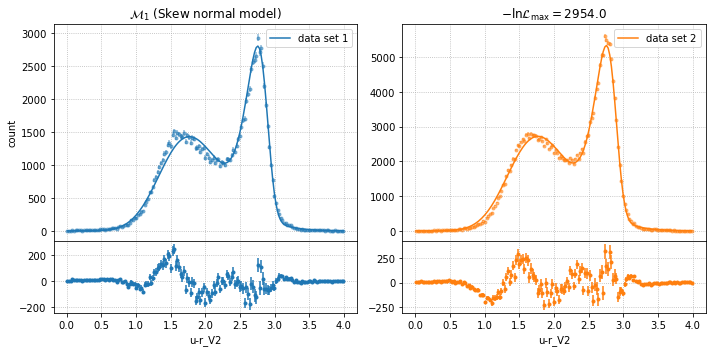

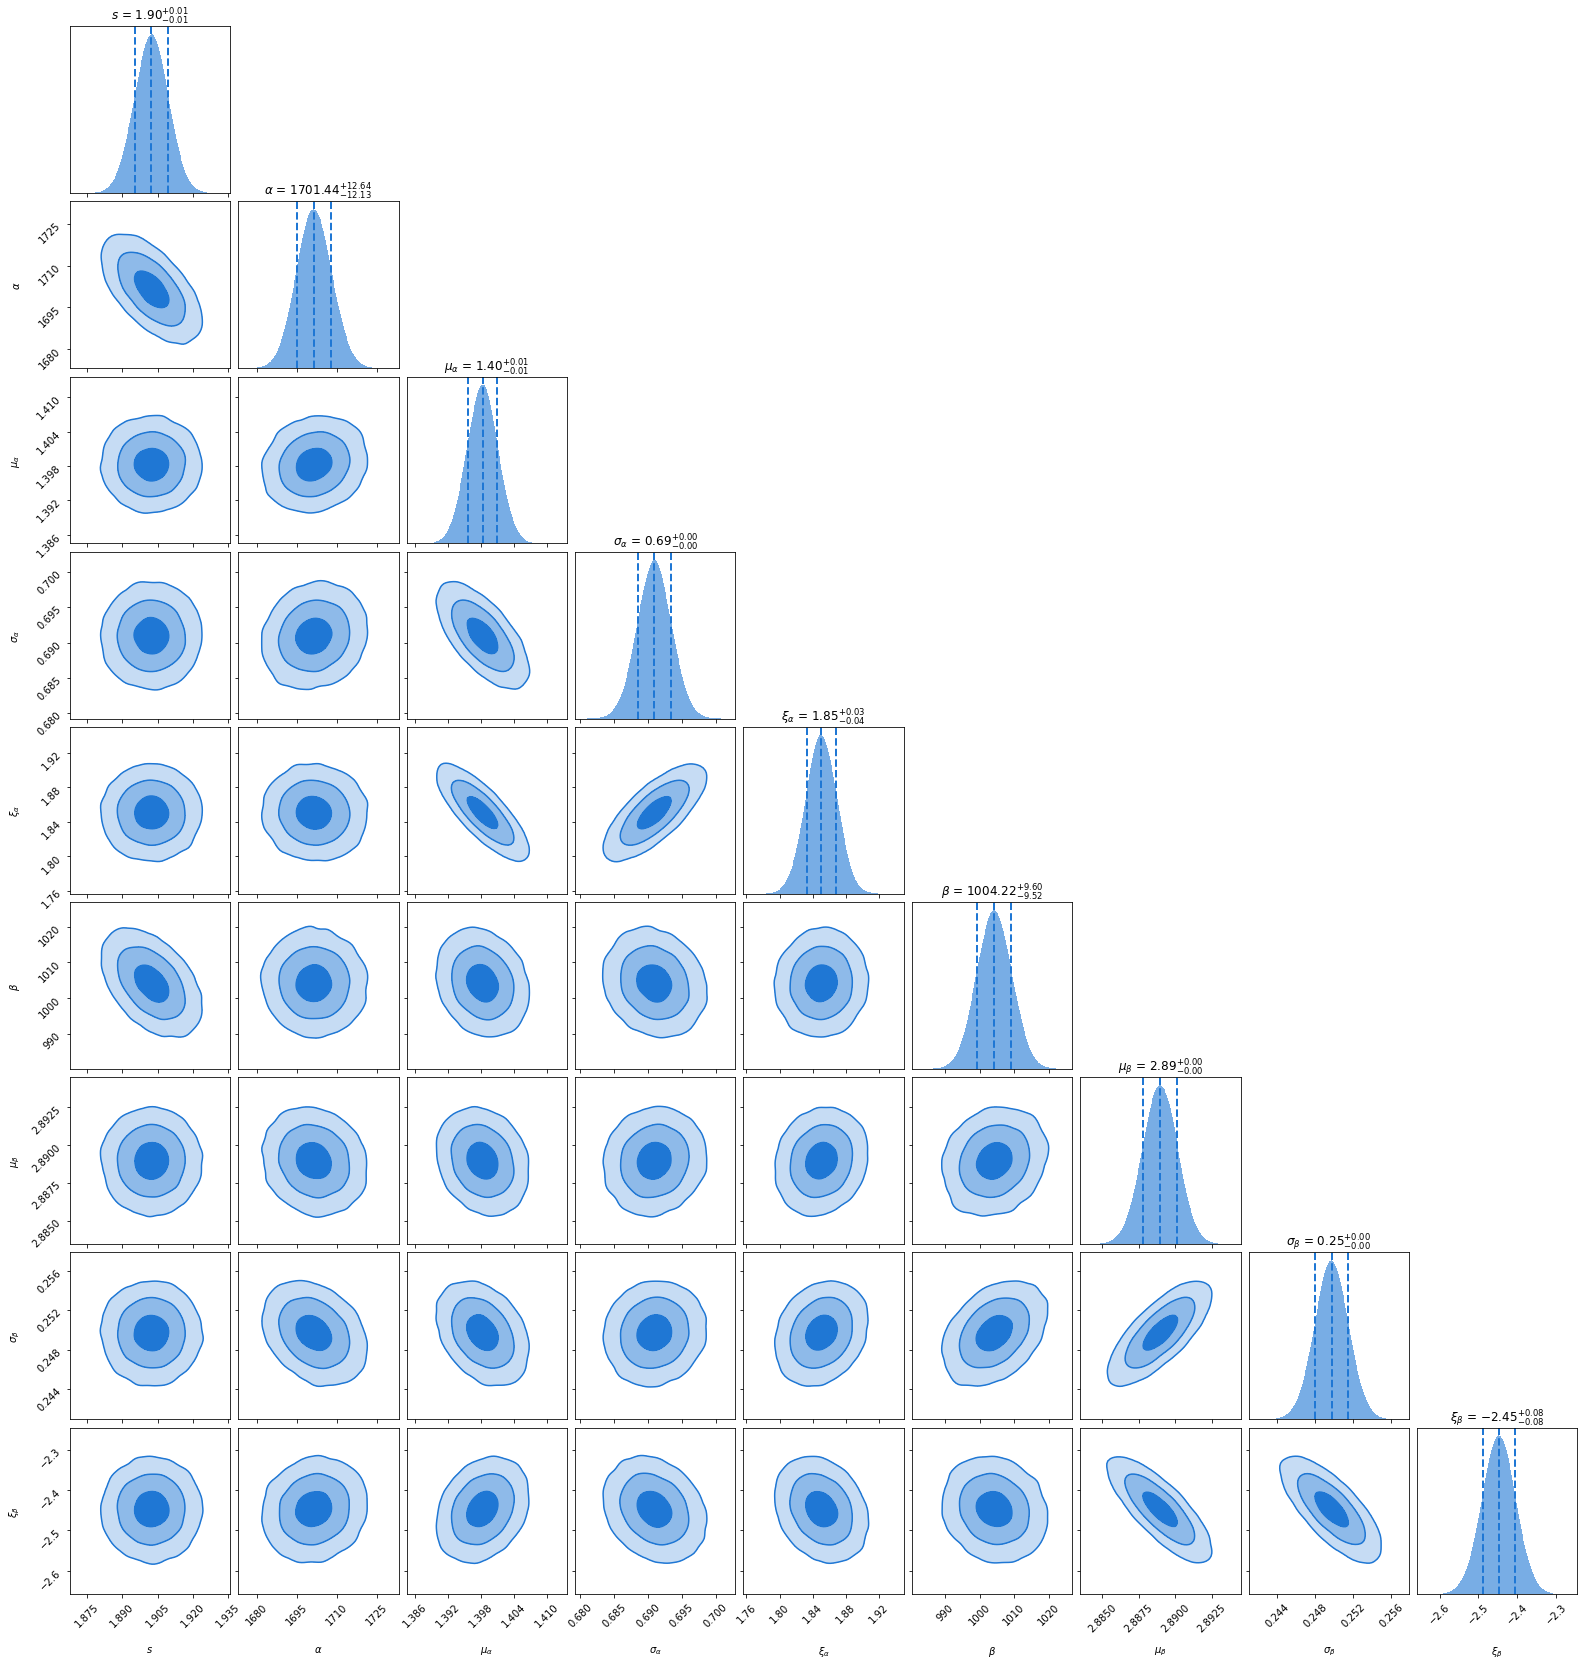

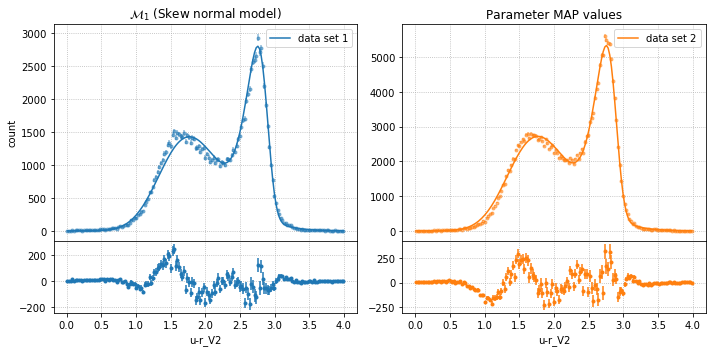

In [7]:


#for V2
print("V2")
plot_hist(data1_wall_v2,data2_void_v2,bins_,label_v2)
print("Running Model 1 using V2...")

#model 1
Model_1_fit(bounds1,data1_wall_v2,data2_void_v2,bins_,label_v2)
Model_1_sampler(prior_xform1,data1_wall_v2,data2_void_v2,bins_,label_v2)
lnZ1_v2 = Model1_output(data1_wall_v2,data2_void_v2,bins_,label_v2)

print("Running Model 2 using V2...")



running minimizer...this might take a few minutes...
plotting best fit results...
running the nested sampler... this might take from minutes to hours...


iter: 9899 | batch: 0 | bound: 120 | nc: 25 | ncall: 220455 | eff(%):  4.480 | loglstar:   -inf < -29103.174 <    inf | logz: -29129.824 +/-  0.325 | dlogz: 13375.945 >  0.010                       /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 12982 | batch: 0 | bound: 163 | nc: 25 | ncall: 301023 | eff(%):  4.305 | loglstar:   -inf < -15054.639 <    inf | logz: -15086.662 +/-  0.354 | dlogz: 6659.021 >  0.010                       /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: 

iter: 59135 | batch: 5 | bound: 762 | nc: 25 | ncall: 1508862 | eff(%):  3.919 | loglstar: -2829.759 < -2819.110 < -2823.586 | logz: -2907.154 +/-  0.568 | stop:  0.877                              

sampler output saved as pickle file 'sampler_results_model2_u-r_V2'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 1.72394499e+03  1.37876518e+00  7.03815109e-01  1.83181610e+00
  9.80234711e+02  2.88881735e+00  2.51063437e-01 -2.42881757e+00
  3.20621799e+03  1.40636225e+00  6.84999594e-01  1.87702062e+00
  1.93874072e+03  2.88893490e+00  2.51028337e-01 -2.48263174e+00]
Best fit results: 
Bayesian Evidence for model 2 :  -2907.1615080754477


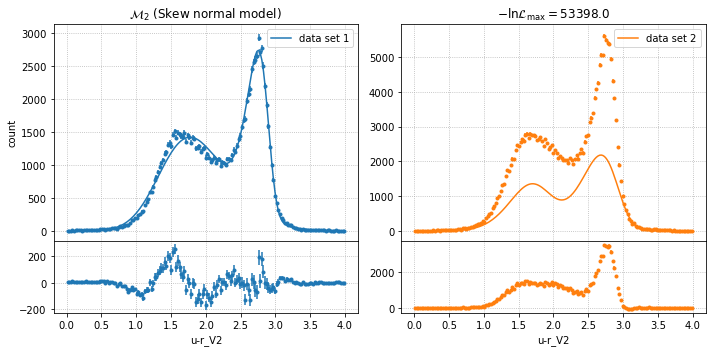

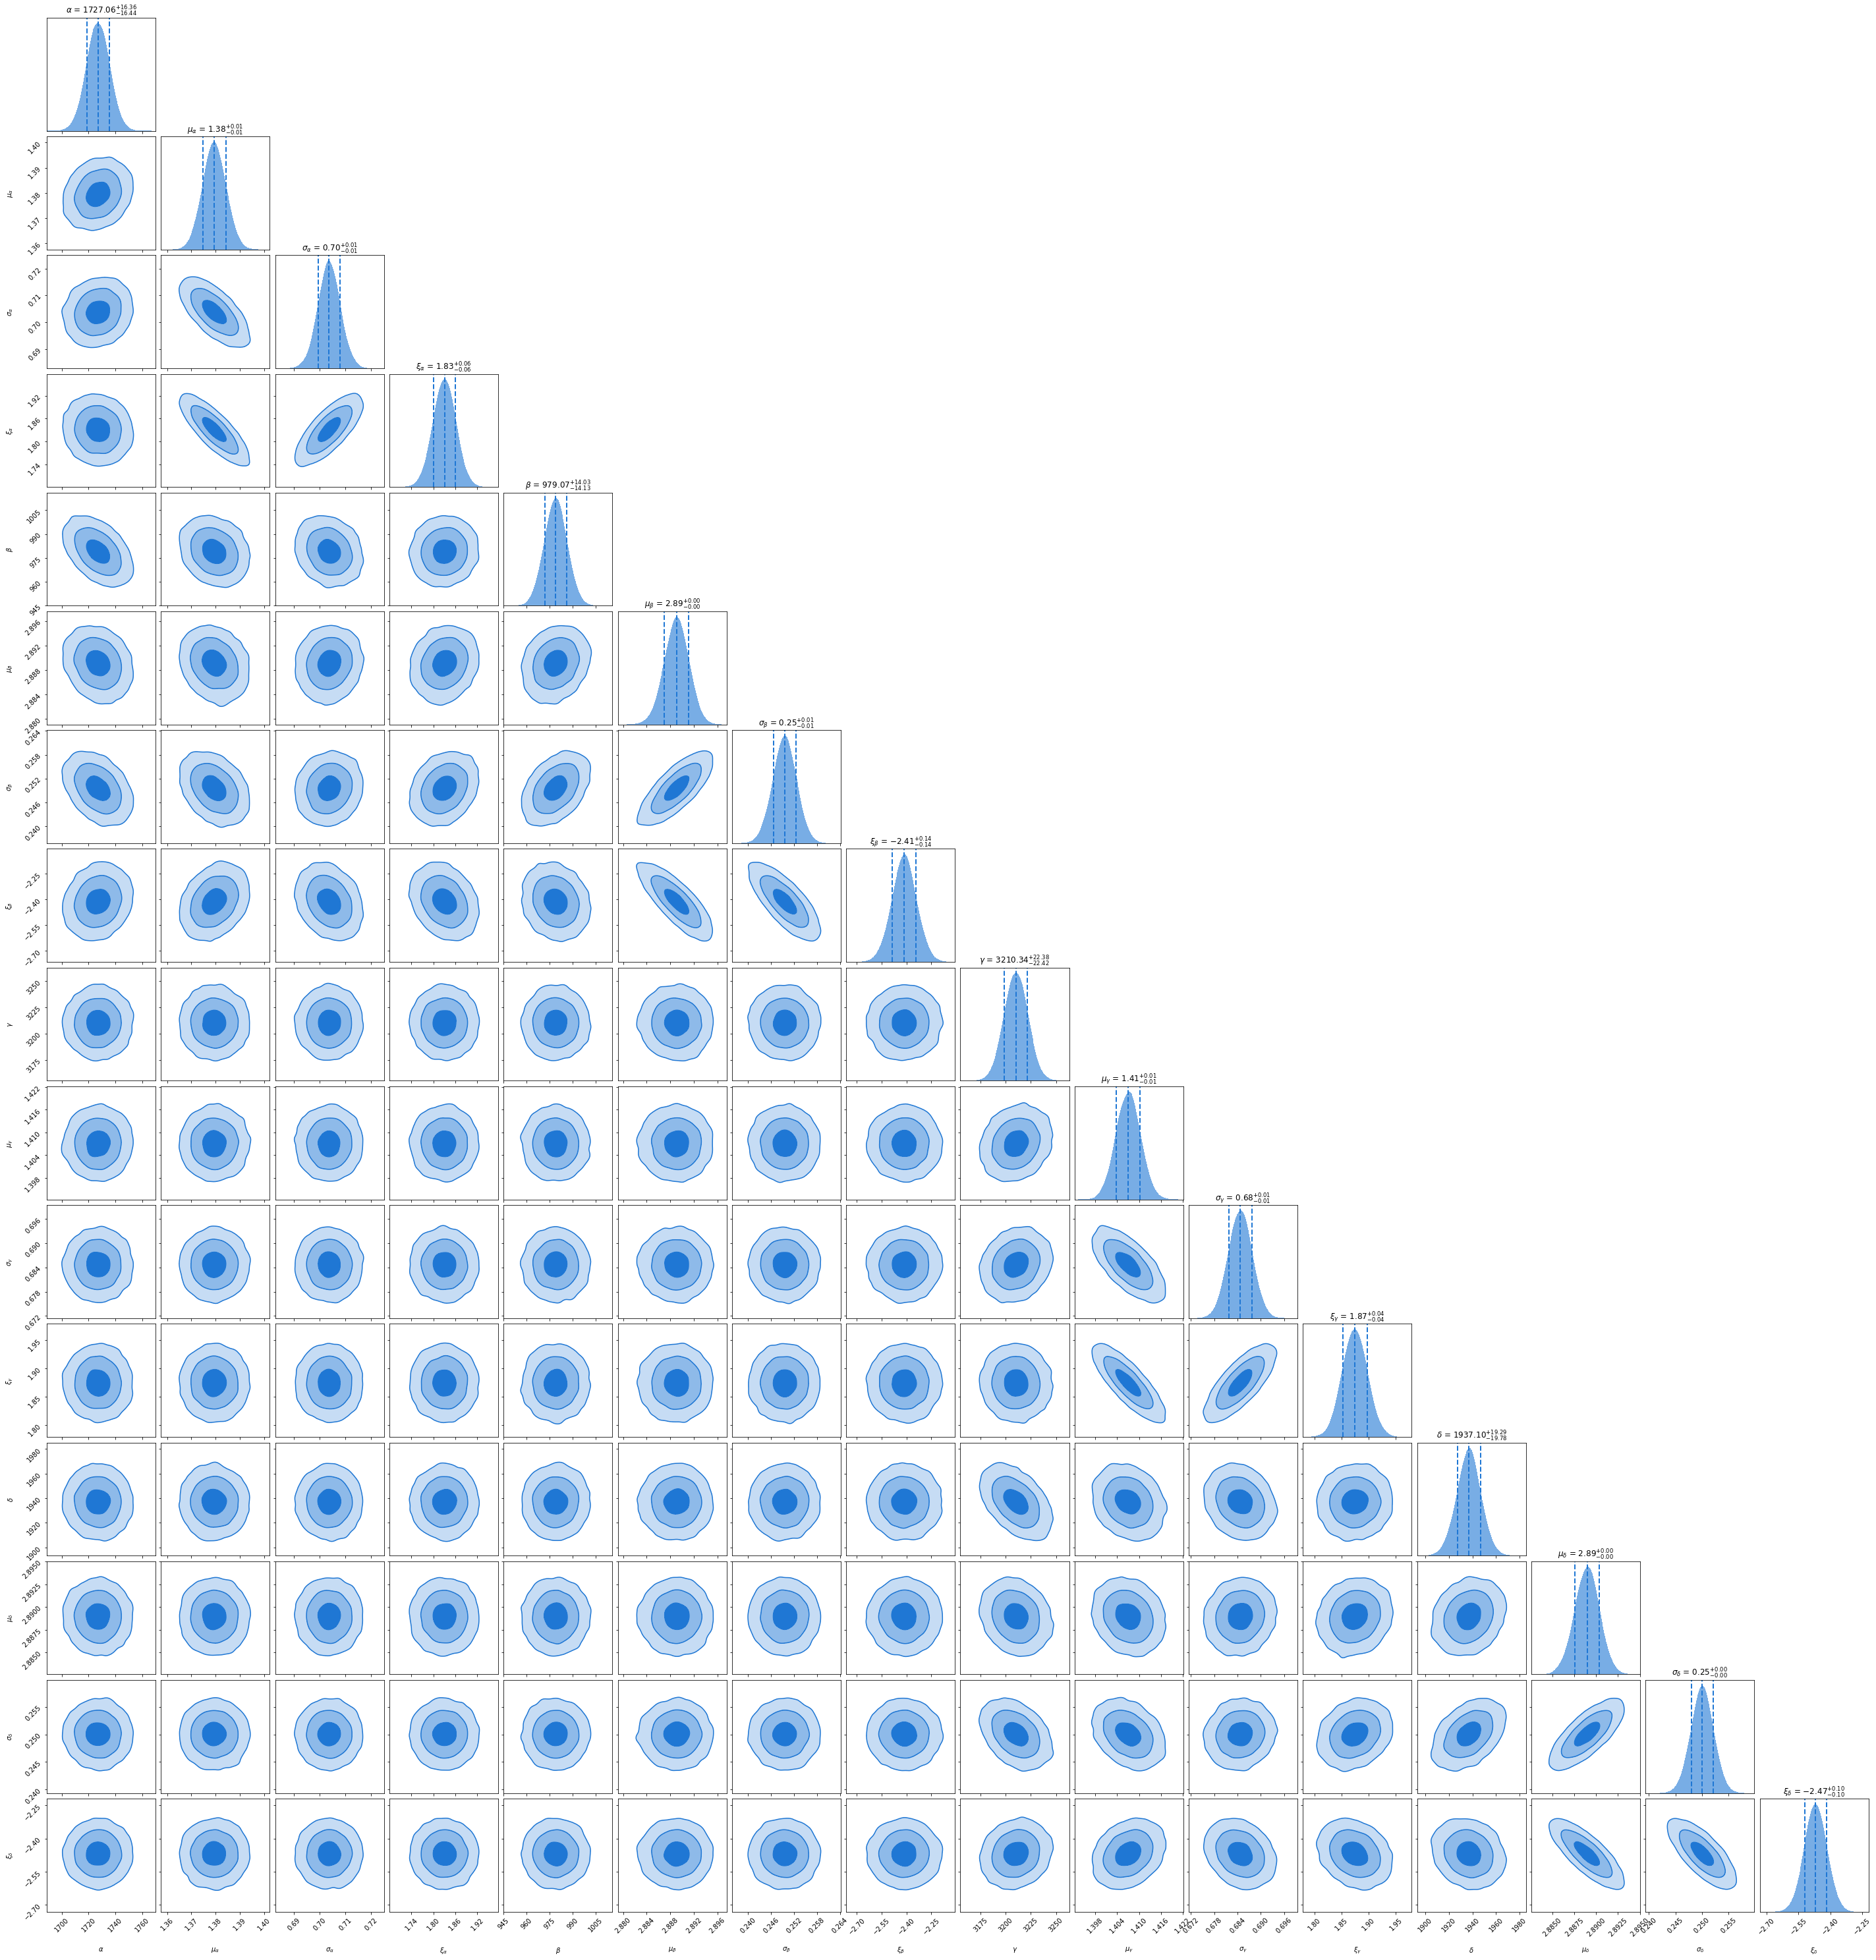

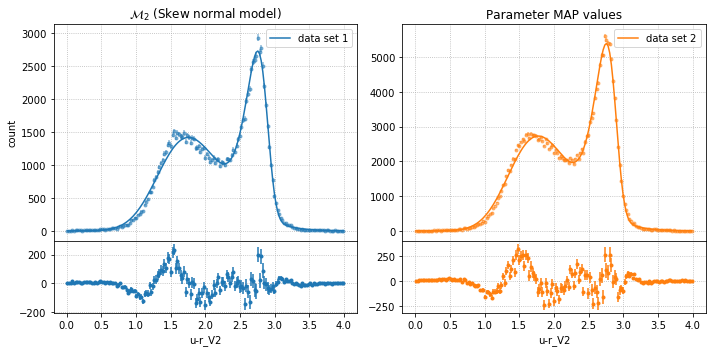

In [9]:
#model2
Model_2_fit(bounds2,data1_wall_v2,data2_void_v2,bins_,label_v2)
Model_2_sampler(prior_xform2,data1_wall_v2,data2_void_v2,bins_,label_v2)
lnZ2_v2 = Model2_output(data1_wall_v2,data2_void_v2,bins_,label_v2)


# #Baye's Factor
# lnB12_v2 = lnZ1_v2 - lnZ2_v2
# logB12_v2 = 0.434 * lnB12_v2

# print("Log of Baye's Factor for g-r using V2 is: ", logB12_v2)